In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Ghi chú:

<br>Data về dân số TG: https://worldpopulationreview.com/
<br>Data về vaccine và COVID-19: Trường ĐH Johns Hopkins - Centers for Civic Impact (https://civicimpact.jhu.edu/)

Viết bởi vupa 20210531

In [2]:
path_covid = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

df = pd.read_csv(path, parse_dates=True)

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2782,2792,2802,2812,2836,2855,2869,2881,2899,2919
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2441,2442,2444,2445,2447,2447,2447,2448,2449,2450
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3405,3411,3418,3426,3433,3440,3448,3455,3460,3465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,709,715,725,731,735,742,745,749,757,764


In [4]:
# melt cot lai - tidy data
df_covid = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date')

df_covid = df_covid[['Country/Region', 'Date', 'value']]

df_coid['Date'] = pd.to_datetime(df_covid['Date'])


In [31]:
path_population = "https://raw.githubusercontent.com/vuanhpham/VUPA_PUB/main/csvData_WorldPopulation.csv"
path_vaccine = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"

In [32]:
df_pop = pd.read_csv(path_population, parse_dates=True)
df_vaccine = pd.read_csv(path_vaccine, parse_dates=True)
# population toi 2018

In [33]:
df_pop = df_pop[['cca2', 'name', 'pop2021']]

In [34]:
df_pop[df_pop['name'] =='Vietnam']
# sanity check

,cca2,name,pop2021
14,VN,Vietnam,98168.833


In [39]:
df_vaccine = df_vaccine[['Country_Region', 'People_partially_vaccinated', 'Date']]

In [51]:
df_vaccine2 = df_vaccine.groupby(['Date', 'Country_Region'])[['People_partially_vaccinated']]\
    .sum()\
    .reset_index()    

In [101]:
df_vaccine3 = pd.merge(df_vaccine2, df_pop, left_on= 'Country_Region', right_on='name', how='left')\
    [['Date', 'Country_Region', 'People_partially_vaccinated', 'pop2021']]
    
df_vaccine3.dropna(subset = ["pop2021"], inplace=True)

# tinh % dan so duoc tiem vaccine, so vaccinated la cumsum
df_vaccine3['pct_vaccinated_pop'] = (df_vaccine3['People_partially_vaccinated'].div(1000))\
    .div(df_vaccine3['pop2021']).mul(100).round(2)

# index date 
df_vaccine3['Date'] = pd.to_datetime(df_vaccine3['Date'])
df_vaccine3  = df_vaccine3.set_index('Date')

# top 30 nuoc co ti le chich vaccine cao
df_top_30_vaccine_countries = df_vaccine3['2021-05'].sort_values(by='pct_vaccinated_pop', ascending=False)\
      .drop_duplicates(subset=['Country_Region'])\
      .head(30)    

## 30 nước có tỷ lệ vaccine cao nhất (ít nhất 1 liều)

In [118]:
df_top_30_vaccine_countries['rank'] = df_top_30_vaccine_countries['pct_vaccinated_pop'].rank(ascending=False)
df_top_30_vaccine_countries

,Country_Region,People_partially_vaccinated,pop2021,pct_vaccinated_pop,rank
Date,,,,,
2021-05-29,Malta,316224.0,442.784,71.42,1.0
2021-05-28,Seychelles,70446.0,98.908,71.22,2.0
2021-05-19,San Marino,22609.0,34.017,66.46,3.0
2021-05-28,Israel,5449566.0,8789.774,62.00,4.0
2021-05-27,Bhutan,482716.0,779.898,61.89,5.0
2021-05-29,United Kingdom,39068346.0,68207.116,57.28,6.0
2021-05-28,Maldives,308905.0,543.617,56.82,7.0
2021-05-29,Canada,21207890.0,38067.903,55.71,8.0
2021-05-29,Mongolia,1852565.0,3329.289,55.64,9.0


## Số ca tử vong trong 1 tuần năm 2021: 
### Việt Nam vs một số nước có tỉ lệ vaccine cao trong top 30 (ít nhất 1 liều)

In [105]:
topCountries= ['Israel', 'United Kingdom', 'United Arab Emirates', 'Germany', 'Italy', 'Singapore']
dfx = df_covid.groupby(['Date', 'Country/Region'])['value'].sum()\
    .unstack('Country/Region')[['Vietnam'] + topCountries]
# death here is cumsum value

# death on daily basis 
# recaculate from cumsum
dfx = dfx - dfx.tshift(1)
dfx = dfx.fillna(0)
# tinh so death moi ngay, break ra tu so cumsum

dfy = dfx.resample('W').sum()['2021']#.plot(figsize=(18, 8))
dfy

Country/Region,Vietnam,Israel,United Kingdom,United Arab Emirates,Germany,Italy,Singapore
Date,,,,,,,
2021-01-03,0.0,190.0,4277.0,22.0,4494.0,3407.0,0.0
2021-01-10,0.0,255.0,6430.0,29.0,6145.0,3423.0,0.0
2021-01-17,0.0,334.0,7862.0,37.0,5965.0,3422.0,0.0
2021-01-24,0.0,414.0,8700.0,47.0,5395.0,3284.0,0.0
2021-01-31,0.0,377.0,8238.0,58.0,4867.0,3055.0,0.0
2021-02-07,0.0,325.0,6314.0,71.0,4545.0,2757.0,0.0
2021-02-14,0.0,267.0,4706.0,93.0,3399.0,2304.0,0.0
2021-02-21,0.0,189.0,3423.0,111.0,2839.0,2141.0,0.0
2021-02-28,0.0,175.0,2273.0,96.0,2206.0,1981.0,0.0


### Chart nước Anh, Đức, Ý và Israel
Vaccine giúp kéo giảm nhanh số lượng ca tử vong

In [220]:
# ve chart the country
def plot_chart(country):
    df_tmp = df_vaccine3['2021'].sort_values(by='pct_vaccinated_pop', ascending=False)
    df_tmp = df_tmp[df_tmp['Country_Region']==country].resample('W').ffill()[['pct_vaccinated_pop']]

    # bo line cuoi - vi chua full week, số là 0
    df_table = dfy[[country]].join(df_tmp)[:-1]
    days_bar = df_table.index

    # normalize cai cot y
    ct_norm = df_table['pct_vaccinated_pop']/df_table['pct_vaccinated_pop'].max() * df_table[country].values.max()
    ct_bar = df_table.loc[days_bar]['pct_vaccinated_pop']
    ct_bar_norm = ct_norm.loc[days_bar]

    fig, ax = plt.subplots(1, 1, figsize=(18, 8), linewidth=2, edgecolor='.5')
    ax.plot(
        df_table.index.values, df_table[country].values, 
        linestyle='--', linewidth=2, color='.2', label='Number deaths per week')

    ax.bar(x=days_bar, height=ct_bar_norm, width = 4, facecolor='0.5', alpha=.3, label='Vaccination rates')

    for x, y, t in zip(days_bar, ct_bar_norm, ct_bar):
        ax.text(x, y+.6, "{percent}%".format(percent=t), ha='center')
 
    plt.title('Country: ' + country)
    plt.legend()

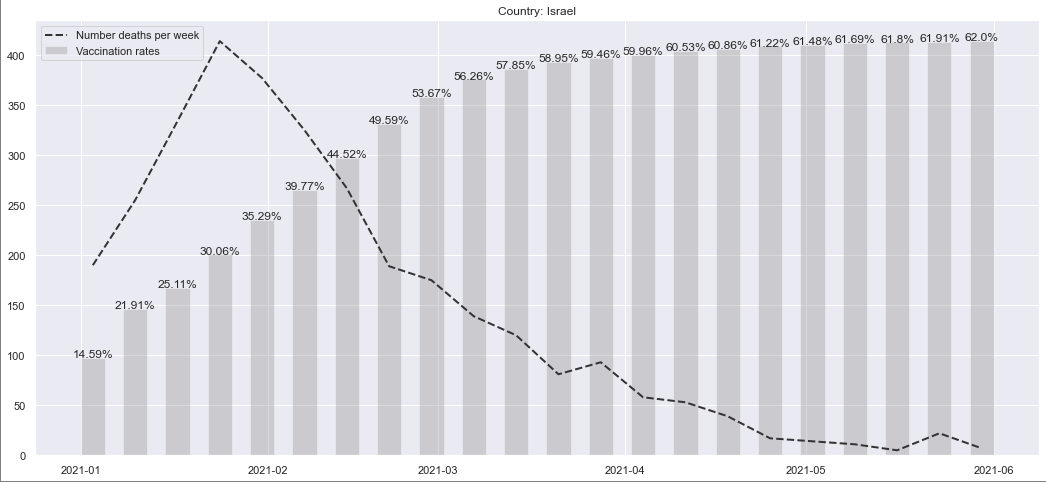

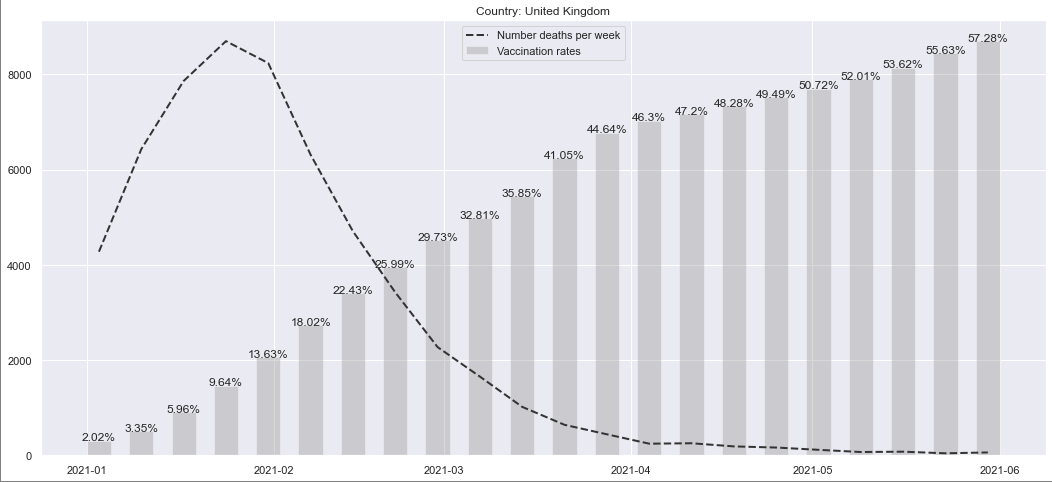

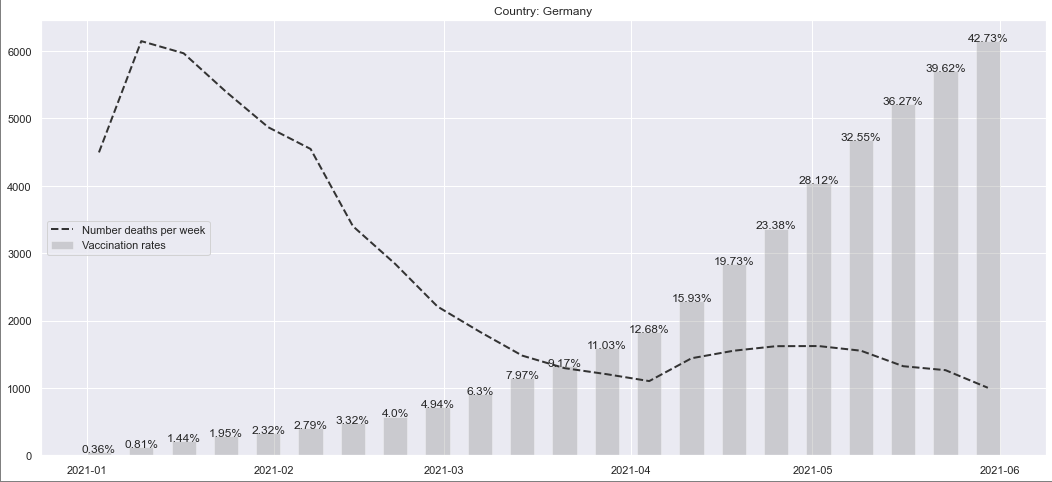

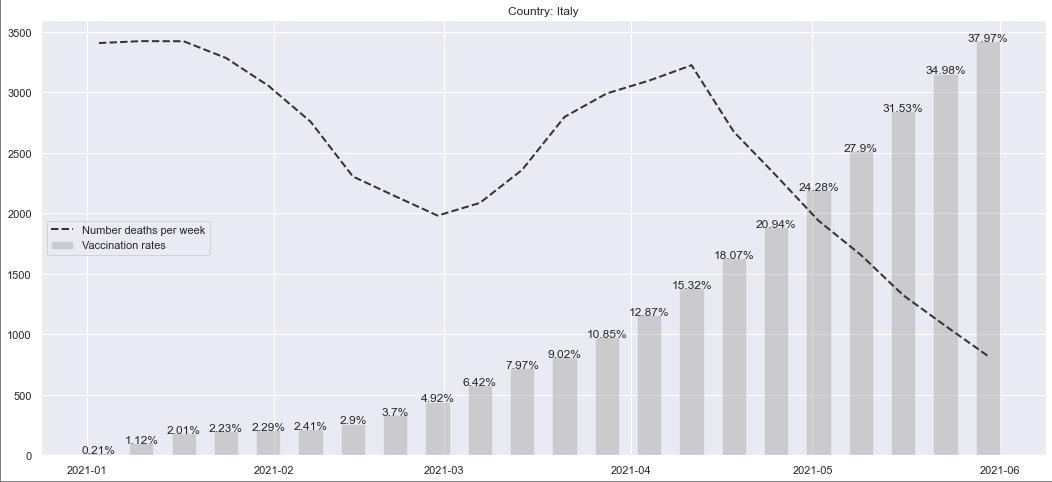

In [221]:
for country in ['Israel', 'United Kingdom', 'Germany', 'Italy']:
    plot_chart(country)